# Bloque 4. Clustering.

|||
|-|-|
|**Alumno**|Ángel García Alcántara<br><angelgarcan@gmail.com>|
|**Materia**|Recuperación de información<br>en Bases de datos no estructuradas<br>Cuarto Semestre|
|**Fecha**|20 de abril de 2020|

## Actividad

Generar una lista de tópicos sobre los tweets de las elecciones presidenciales de 2018. Para la tarea el estudiante deberá implementar dos  algoritmos de clustering, pueden ser $K\textit{-}Means$ y FFT o si lo prefiere algún otro de su elección. En caso de implementar un algoritmo diferente  a los descritos en clase, se deberá incluir una sección en su reporte con la descripción del algoritmo elegido.  

La tarea consiste en reproducir el pipeline descrito utilizando sus implementaciones de los algoritmos de clustering. El alumno deberá aplicar el pipeline a un subconjuto seleccionado aleatoriamente(no continuo, no usar head()), el subconjuto deberá ser del 10% de total de tweets en el archivo csv proporcionado para esta tarea. La tarea deberá incluir al menos los siguientes elementos:

1. Definir el preprocesamiento a aplicar a los datos. Es necesario que en este punto se describa y justifique la elección del mismo. 
2. Aplicar el pipeline descrito a los documentos generados para diferentes valores de $K$ (se recomienda $2 \leq K \leq 15$). Para cada valor de $K$ calcular el coeficiente de silueta(puede utilizar el implementado en sklearn o realizar una propia) y/o $SSE$  para determinar la $K$  óptima. Este análisis deberá incluirse en el reporte.
3. Hacer un análisis cuantitativo y cualitativo los clusters generados para el valor "óptimo" de $K$. 
4. Si es posible, en base a los tópicos identificados poner un nombre a cada cluster identificado (por ejemplo "noticias", "pro-xxx", "ofensivo", etc...). Justificar las categorías elegidas
5. Generar el la lista de tópicos para cada cluster utilizando la siguientes estrategías:
    - Visualmente mediante la nube de palabras
    - Utilizando las $t$ palabras más frecuentes en cada cluster, justificar su elección para el valor de $t$
    - Utilizando las $t$ palabras más similares al centroide de cada cluster, justificar su elección para el valor de $t$
6. Conclusiones

### Entregables

- Reporte en un notebook de jupyter
- Archivo .py con la implementación de sus funciones (preprocesamiento, algoritmo de clustering, etc)



## Introducción

El proceso de clustering o agrupamiento, es un procedimiento de aprendizaje no supervisado utilizado para descrubir/explorar la estructura de una colección de 
objetos. El objetivo es dividir el conjunto de objetos en grupos/clusters/clases de objetos **similares** mientras son separados de objetos **no similares**. Las clases generadas representan una generalización sobre los objetos y sus características. 

Formalmente, el problema puede definirse cómo sigue: utilizando como entrada una colección de objetos $X$ y un valor entero $K$ y obtener un conjunto $G=\{G_1,G_2,...,G_K\}$. Donde cada objeto  $x_i \in X$ es un vector definido en $\mathbb{R}^N$,  se cumple que  $1 < K \leq |X|$. Al finalizar el proceso cada elemento $x_i$ debe pertenecer a uno de los grupos en $G$

#### Definiciones adicionales
- $m_k$ es el número de elementos en el grupo $G_k$, es decir $m_k=|G_k|$
- $c_k$ será utilizado para referirse al centroide de todos los elementos en $G_k$, el cuál puede ser:
    - la media geométrica $$c_k = \frac{1}{m_k} \sum_{i=1}^{m_k} x_i $$
    - la mediana
    - uno de los elementos en el grupo(centro)
- Se utilizará $M$ para hacer referencia al conjunto de centroides $\{c_1,c_2,...,c_k\}$.
- En el problema de clustering a considerar cada objeto $x_i$ solo pertenece a un grupo, por lo tanto  para cualquier par de grupos  $G_A, G_B$ donde $A \neq B$, se cumple que: 
$$G_A \cap G_B = \emptyset$$

Como mencionamos el proceso de clustering es una tarea de exploración de datos, lo cual implica que normalmente no se cuenta con información relativa a los resultados esperados del análisis. Algunos de los resultados esperados podrían ser: 

- El número de grupos $K$
- El tamaño de los grupos (número de elementos en cada cluster)
- La densidad de los grupos
- La posición de los clusters

Existen muchas tareas donde se aplica el proceso de clustering, las cuales van desde  aplicaciones de recuperación de información, biología, medicina, negocios, entre otros. Solo por mencionar algunos ejemplos:

Podemos sumarizar el proceso de clustering como sigue:

1. Definición del dominio, lo cual implica: 
    - identificar los objetos a analizar (para nuestro caso sería una colección de tweets)
    - determinar el propósito de generar grupos (generar tópicos, lo describiremos mas adelante)
    - el conjunto de características que describen los objetos (word embeddings)
2. Definir una función de comparación, es decir como se determina que tan parecidos son los objetos
3. Definir cómo medir la calidad de los grupos encontrados. 
4. Determinar el algoritmo de clustering a utilizar

### Medidas de calidad

Evaluar si un agrupamiento es **"bueno"** o no, no es una tarea simple, desde que no existe un criterio definitivo para determinarlo. Sin embargo se han propuesto muchos criterios de evaluación, los cuales podemos dividir en externos e internos.

#### Medidas internas

Este tipo de medidas evalúan que tan compactos son los clusters mediante el uso de una medida similitud o distancia. Esta clase de métricas generalmente intentan medir la cohesión en cada cluster (intra-cluster), la separación de los diferentes clusters (inter-cluster) o bien una combinación de ambas. Algunos ejemplos son:

##### La suma de los errores al cuadrado (SSE o inercia)

SSE es la medida más simple y consiste en calcular la suma de la distancia de todos los objetos con respecto de los centroides de sus respectivos grupos. Se calcula mediate la siguiente formula:

$$\mathit{SSE} = \sum_{k=1}^{K} \sum_{\forall x_i \in G_k} (x_i-c_k)^2$$

donde $G_k$ es el $k$-ésimo cluster y $c_k$ es el centroide del grupo. SSE es una forma simple de medir que tan diferentes son los elementos en un cluster con respecto de su centro geométrico. Esta medida permite maximizar la similitud entre objetos en el mismo grupo mediante la minimización del SSE. 


#### Como elegir el valor de $K$?

Este problema ha sido objeto de muchos estudios, pero solo mencionaremos brevemente dos métodos de los muchos que existen en la literatura. 
- **Método de Elbow**: Consiste en calcular el valor del $SSE$ para valores continuos de $K$ y elegir el valor en que se da el cambio máximo en el valor de $SSE$.

- **Método de la silueta**: En este caso de cálcula el valor del coeficiente de silueta y se elige el valor de $K$ que presente el valor máximo del score. 

### Algoritmos de Clustering
Los diferentes algoritmos de clustrering pueden ser divididos con respecto a cómo generan los grupos, ya sea de forma jerárquica o particional. Un algoritmo particional crea el conjunto de clusters dividiendo los objetos en grupos disjuntos, lo cual se puede realizar hasta obtener grupos con un único elmento. Mientras que los métodos jerárquicos permiten la existencia de sub-grupos, es decir grupos anidados. El proceso de clustering puede verse como un árbol binario (dendrograma) en el que las hojas son los clusters que contienen un solo elemento, los nodos internos representan la unión de sus dos hijo y la raíz sería un único cluster que contiene todos los objetos en la colección.

|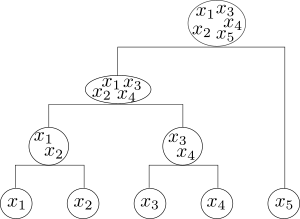|
|:--:|
|**Dendrograma (Clustering Jerárquico)**|

Nosotros nos enfocaremos en métodos particionales.

#### $K$-Means

Es un algoritmo basado en particionado. El algoritmo requiere cómo entrada la colección $X$ y el número de clusters $K$. El proceso comienza seleccionando $K$ elementos de $X$, los cuales son utilizados como los centroides iniciales. Posteriormente cada punto es asignado a su centroide más cercano, todos los elementos asignados a un mismo centroide forman un cluster. Una vez asignados todos lo elementos se calcula el centroide $c_k$ para cada uno de los grupos. Se repiten el proceso de asignación y actualización de los centroides hasta que no hay cambios en los centroides. Podemos resumir el algoritmo en el siguiente listado:



------
**Algoritmo básico para K-Means**


------
1. Seleccionar $K$ objetos de $X$ como centroides iniciales
2. **repetir**
3. &nbsp;&nbsp;&nbsp;&nbsp;Para cada $x_i \in X$ asignar $x_i$ al grupo representado por su centroide más cercano 
4. &nbsp;&nbsp;&nbsp;&nbsp;Recalcular los centroides en base a los grupos obtenidos
5. **hasta** que los centroides no cambien
------
------

**Farthest First Traversal (FFT)**

FFT es un algoritmo que permite seleccionar $K$ centros de una colección de objetos. Un centro a diferencia de un centroide es un elemento que forma parte de la colección de datos. En FFT cada centro es seleccionado de tal forma que cualquier objeto $x_i \in X$ está a lo más  una distancia $r$ de uno de los centros. Al igual que $K$Means, FFT es un algoritmo de pariticionado, solo que en este caso cada $G_k \in G$ será defino en base a  la partición generada por los centros, utilizaremos $R_C$ para referiremos al conjunto de centros generados por el algoritmo.

Este algoritmo fue inicialmente propuesta por Teofilo González como un aproximación a la solución del problema de $K$-Centros, la cual es a lo más dos veces la solución óptima. Utilizando FFT podemos calcular un conjunto $R_C$, conde cada $c_j \in R_C$ son lejanos entre si. Esto se consigue simulando un recorrido, donde en cada iteración $k$, $c_k$ es seleccionado como el elemento más alejado de los elementos ya seleccionados. Sea  $r_k$ la distancia utilizada para seleccionar el centro $c_k$, entonces en la iteración $k$ se cumple que:

- Cualquier par de objetos $x_i,x_j \in X$ se encuentran al menos a distancia $r_k$ el uno del otro.
- Cualquier elemento $x_i \in X$ se encuentra a lo más a distancia $r_k$ de uno de los centros $c_j \in R_C$ (cada elemento se asigna a la partición de su centro más cercano)

Para facilitar la definición del algoritmo definimos $d_{\min}(x)$ como la distacia entre un elemento $x$ y su centro más cercano en $R_C$, entonces: 
$$d_{\min}(x)=\min\{d(x,c) \mid c \in R_C\}$$

------
**Algoritmo Farthest First Traversal**


------
1. $c_1 \gets x_i$, donde $x_i$ es seleccionado aleatoriamente de $X$
2. $R_C \gets \{c_1\}$ 
3. **Mientras** $|R_C|<K$
4. &nbsp;&nbsp;&nbsp;&nbsp; $c_n \gets \arg\max\{d_{\min}(x) \mid x \in X \setminus R_C\}$ 
5. &nbsp;&nbsp;&nbsp;&nbsp; $r \gets \max\{d_{\min}(x) \mid x \in X \setminus R_C\}$
6. &nbsp;&nbsp;&nbsp;&nbsp; $R_C \gets R_C \cup \{w\}$
7. $G \gets \{G_1,G_2,...G_k\}$ 
------
------

donde cada $G_k$ es el conjunto de los elemento $x_i$ que tiene como su centro más cercano al centro $c_k$

La siguiente figura muestra la evolución de algoritmo FFT, puede observarse que la distancia máxima disminuye a cada iteración; asi como el orden en que se eligen los puntos.

|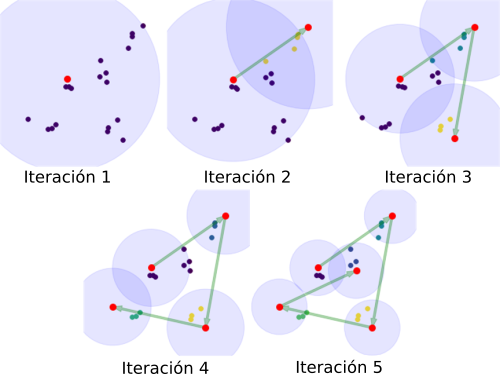|
|:----:|
|**FFT para $K=5$ sobre 5 nubes de puntos generadas mediante una distribución normal**|

FFT tiene la ventaja adicional que su complejidad está acotada por $O(D K n)$ donde $D$ es la dimensión de los datos, $n$ el número de elementos en la base de datos y $K$ el número de centros. La solución mencionada es la mejor solución conocida para el problema. Por otro lado la solución obtenida es a lo más 2 veces la solución ópitma. Si utilizamos $K$Means la solución es $O(K D n I)$ donde I es el número de iteraciones.  Finalmente hay que notar que los dos algoritmos optimizan variables diferentes, mientras que $FFT$ minimiza la distancia máxima de los datos a uno de los centros; $K$ means optimiza el error cuadrático $SSE$. 

## Identificación de tópicos

La identificación de tópicos consiste en obtener los *temas* de los que se habla en una colección de documentos. Una forma natural de resolver este problema es agrupando los documentos similares y aplicar un análisis estadístico para identificar los términos o conjunto de términos que representan un tópico. Note que un tema o tópico no sólo se requiere obtener las palabras que más repiten, sino que esas palabras tengan un significado juntas (recuerde cómo se aprenden los embeddings!). Algunas aplicaciones relacionadas con identificación de tópicos son:  La sumarización de documentos, encontrar los tópicos relevantes en grandes colecciones de documentos, por ejemplo resumir los eventos relevantes que ocurrieron en la bolsa, o durante un día de campaña; clasificación de documentos no supervisada utilizando los tópicos generar las categorías, análisis de sentimiento, etc....

En nuestro caso de estudio queremos generar los tópicos para el conjunto de tweets de la campaña presidencial de 2018. El proceso de identificación que propondremos será el descrito por la siguiente figura.

|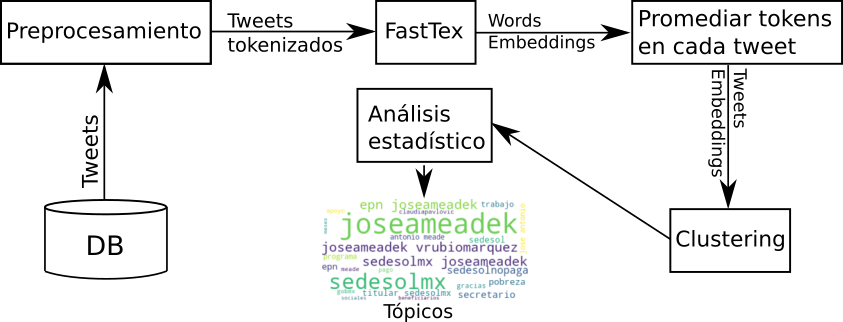|
|:---:|
|**Pipeline para la identificación de tópicos**|

## Desarrollo

In [104]:
# # Ocultar In[] y Out[] en cada celda.
# from IPython.core.display import display,HTML
# display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))

In [3]:
# PLUGINS N MAGICS
%load_ext jupyternotify
%autonotify -a 30

# Multiple outputs per cell in Jupyter 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<IPython.core.display.Javascript object>

In [4]:
%%javascript
// Evitar autoscroll.
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat
import pandas as pd
%matplotlib inline  
%load_ext autoreload
%autoreload 2
from skeleton import *
from tqdm.auto import tqdm,trange
import nltk
nltk.download('punkt')
from wordcloud import WordCloud
import random
from copy import deepcopy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Implementar dos algoritmos de clustering. KMeans y FFT.

In [11]:
class Clustering2(Clustering):
    
    # se asigna el método de inicialización de Kmeans (default="fft")
    def __init__(self, *args, k_init="fft", **kwargs):
        super().__init__(*args, **kwargs)
        self.k_init_ = k_init
        
    # asigna los elementos en la colección a su centroide más cercano
    # genera las etiquetas de los clusters
    # almacena la distancia de cada elemento a su centroide más cercano
    def _assign_nearest_centroids(self):
        self.labels_=[-1 for _ in self.data]
        self.dists_=[-1 for _ in self.data]
        for j in range(len(self.data)):
            dists = [(self.distance_function(c, self.data[j]), i, self.data[j])
                     for i, c in self.centroids_.items()]
            dists.sort()
            self.labels_[j]=dists[0][1]
            self.dists_[j]=(dists[0][0],j)
            
    def KMeans(self):
        self.centroids_ = {}
        C = []
        if self.k_init_ == 'fft':
            self.FFTraversal()
            for i, c in self.centroids_.items():
                C.append(c)
        elif self.k_init_ == 'random':
            C = np.random.uniform(low=np.min(self.data, axis=0) * .4,
                                  high=np.max(self.data, axis=0) * .4,
                                  size=(self.n_clusters, self.data.shape[1]))
#             self.labels_ = []
#             for i in range(len(self.data)):
#                 self.labels_.append(np.int64(np.random.choice(range(self.n_clusters))))
#             for i in range(self.n_clusters):
#                 cs = self.data[np.where(self.labels_ == np.int64(i))[0]]
#                 if len(cs) > 0:
#                     C.append(np.mean(cs, axis=0))
        else:
            raise Exception(f"k_init={self.k_init_} is not defined")
            
        C = np.array(C)
        error = np.inf
        while error != 0:
            self.labels_ = []
            C_old = deepcopy(C)
            for i in range(len(self.data)):
                distances = [(self.distance_function(c, self.data[i]), j, self.data[i])
                    for j, c in enumerate(C)]
                distances.sort()
                cluster = distances[0][1]
                self.labels_.append(cluster)
            for i in range(self.n_clusters):
                cs = self.data[np.where(self.labels_ == np.int64(i))[0]]
                if len(cs) > 0:
                    C[i] = np.mean(cs, axis=0)
            error = np.sum(C - C_old)
        self.centroids_ = {}
        for i, c in enumerate(C):
            self.centroids_[np.int32(i)] = c
        self._inertia()
        return self

    def FFTraversal(self):
        self.centroids_ = {}
        c1_idx = np.random.choice(self.data.shape[0])
        self.centroids_[np.int32(c1_idx)] = self.data[c1_idx, :]
        while len(self.centroids_.keys()) < self.n_clusters:
            self._assign_nearest_centroids()
            self.dists_.sort()
            cn_idx=self.dists_[-1][1]
            self.centroids_[np.int32(cn_idx)] = self.data[cn_idx, :]
        self._assign_nearest_centroids()
#         self.dists_.sort()
        self._inertia()

#### Se carga archivo csv y selecciona 10% de los tweets

In [14]:
!wc -l data/dominio-elecciones18_min.csv

20 data/dominio-elecciones18_min.csv


In [15]:
# Seleccionando un subconjunto aleatorio no continuo del 10% del total de tweets.
csv=pd.read_csv('data/dominio-elecciones18_min.csv')
sample_tweets=csv.sample(n=int(csv.shape[0]*0.1)).text
print(f"Seleccionados {sample_tweets.shape[0]} de {csv.shape[0]} tweets.")

ParserError: Error tokenizing data. C error: Expected 65 fields in line 3, saw 67


#### Preprocesamiento

Consiste en los siguientes pasos:
- Convertir a minúsculas,
- Remover URL's,
- Convertir caracteres a su representación ASCII (reemplaza caracteres raros ü, ñ, etc.),
- Remover saltos de línea,
- Reemplazar cadenas de carateres repetidos 3 veces o más por solo dos ocurrencias,
- Remover palabras de un solo un caracter, ya que no aportan significado real.

La conversión a minúsculas, el reemplazo de saltos de línea, URL's, caracteres raros es necesario para normalizar las palabras.

Sabiendo que los textos provienen de una escritura común, en donde se suelen repetir letras de una palabra para representar un tono de voz o enfásis (e.g. _"hooooola"_ , _"aburridoooooo"_ ), es buena idea reemplazar las múltiples repeticiones de un caracter para que las mismas palabras se puedan agrupar.

Según el análisis que se describirá a continuación, remover las stopwords no impacta en el desempeño del clustering en términos de calidad (medición de inertia) pero sí impacta en el tiempo de procesamiento (ya que son menos palabras).

###### Análisis de impacto de pasos en el preprocesamiento
Para saber qué pasos en el preprocesamiento del texto mejoran o no la calidad del resultado de clustering se tomaron 266 tweets muestra y se corrió manualmente todo el pipeline variando la aplicación de dichos pasos, el resultado es el siguiente:


|||||
|-|-|-|-|
|saltoLinea,<br>repetidos y<br>huerfanos|stemming|Best inertia|
|$\checkmark$||0.0085|
|$\checkmark$||0.0085|
|||0.0107|
|$\checkmark$|$\checkmark$|0.0180|
|$\checkmark$|$\checkmark$|0.0180|


Del análisis anterior se concluye sobre el impacto en la calidad de los clusters resultantes:
- Aplicar stemming tiene un impacto negativo.
- Remover saltos de línea, caracteres repetidos y huérfanos tiene un impacto positivo.

###### Override de funciones de limpieza de texto
Se sobreescriben las siguientes funciones para cambiar los pasos incluidos en el preprocesamiento de una sentencia.

In [ ]:
def preprocess(sentence):
    st=sentence.lower() # Minúsculas.
    st=re.sub(r"http\S+", "", st) # URL's.    
#     st=re.sub(r'@\S+', '', st)  # Citas.
    st=st.translate(punctuation_table) # Signos de puntuacuión.
    # Acentos y caracteres raros.
    st=unicodedata.normalize('NFKD', st).encode('ASCII', 'ignore').decode()
    st=re.sub(r'\n', ' ', st) # Saltos de línea.
    st=re.sub(r'(.)\1\1+', r'\1\1', st)  # Caracteres repetidos 3 veces o más.
    st=re.sub(r' [^ ] ', ' ', st)  # Caracteres huérfanos.
    st=re.sub(r'[^a-z ]', ' ', st).strip()  # Números y otros.
    tokens=[word for word in word_tokenize(st) if word not in stop_words]
#     tokens=removeStopWords(tokens)
#     tokens=stemming(tokens)
    return tokens

In [ ]:
# Para tokenizar una lista de textos                            
def tokenize_sentences(texts):
    tokenized_texts=[preprocess(txt) for txt in texts]
    return np.array(tokenized_texts)

###### Stemming
Reduce las palabras a su raíz común.

In [ ]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

def stemming(txtLst):
    new_txtLst = txtLst[:]
    for idx, w in enumerate(new_txtLst):
        new_txtLst[idx] = stemmer.stem(w)            
    return new_txtLst

In [ ]:
#tokenizamos
sample_tokens=tokenize_sentences(sample_tweets)
print("Ejemplo de tweet plano:",sample_tweets.iloc[9])
print("Ejemplo de tweet tokenizado:",sample_tokens[9])

#### Obtenemos un modelo FastTex  para generar los word embeddings

In [ ]:
from gensim.models import FastText
# definimos el modelo 
sample_model = FastText(size=100, window=3, min_count=1, min_n=2, max_n=5)

In [ ]:
#construimos el vocabulario
sample_model.build_vocab(sentences=sample_tokens)

In [ ]:
# Entremanos el modelo
sample_model.train(sentences=sample_tokens,total_examples=len(sample_tokens), epochs=10)

#### Generamos los tweets embeddings 

In [ ]:
tweets_embeddings=np.array([np.mean([sample_model.wv[token] for token in tweet],axis=0) 
                   for tweet in sample_tokens]) 

In [ ]:
#hacemos aliases para escribir menos
te=tweets_embeddings
tk=sample_tokens

###### Iteramos en búsqueda de la K óptima

Para analizar la calidad de los clusters para todas las combinaciones de algoritmos y de valores de $K$ se itera sobre ellas y se obtiene la que arroja una inercia menor.

Para ejecutar más rapidamente este análisis, se tomaron solo los primeros 1000 tweets. Esto no afecta la cantidad de tweets usados en el clustering real.

In [ ]:
ALGORITHMS="KMeans","FFTraversal","randomClustering"
results=[]
for alg in ALGORITHMS:
    for k in trange(2,15+1):
        cluster_model=Clustering2(n_clusters=k,algorithm=alg,
                                  distance_function=coseno).fit(te[:100])
        csn=len(set(cluster_model.labels_))
        inertia=cluster_model.inertia_
#         tqdm.write(f"alg={alg}; k={k}; inertia={inertia}", nolock=False)
        results.append((inertia,alg,k))
results.sort()
print(f"Best: inertia={results[0][0]}; alg={results[0][1]}; k={results[0][2]}")
print(f"Average={np.mean([r[0] for r in results])}")
results

#### Aplicamos clustering utilizando los tweet embedings y usando la K óptima calculada

In [ ]:
results

Luego de encontrar la K óptima se procesan todos los tweets muestreados (10% del total)

In [ ]:
nc=0
n_clusters=results[nc][2]
alg=results[nc][1]
print(f"Processing optimal K: (n_clusters='{n_clusters}', algorithm='{alg}') over {te.shape[0]} tweets")
cluster_model=Clustering2(n_clusters=n_clusters,algorithm=alg,distance_function=coseno,k_init="fft").fit(te)

In [ ]:
from collections import Counter
print("Inertia =",cluster_model.inertia_)
print("Count tweets =",len(cluster_model.data))
print("Count labels =",len(cluster_model.labels_))
print("Count clusters =",len(set(cluster_model.labels_)))
print("Count elements per cluster:",Counter(cluster_model.labels_))
print("Centroids calculated: ", cluster_model.centroids_.keys())
print("Centroids assigned: ", set(cluster_model.labels_))

Podemos ver los clusters en dos dimensiones

In [ ]:
plotPCA(te,cluster_model.labels_,centroids=cluster_model.centroids_,d=2,vectors=False)

In [ ]:
# Solo los centroides
# hacemos que los vectores de los centroide sean los datos
# y sus etiquetas el parámetro labels
labels,vals=list(zip(*cluster_model.centroids_.items())) 
plotPCA(np.array(vals),labels,centroids=cluster_model.centroids_,d=2,vectors=True)

### Análisis Estadístico

In [ ]:
#mostramos las nubes de palabras
i=1
fig=plt.figure(figsize = (10, 8), facecolor = None)
for k,v in cluster_model.centroids_.items():
    tks=tk[np.where(cluster_model.labels_==k)]
    flist=[' '.join(token) for token in tks]
    ftext=' '.join(flist)
    print("Cluster id:%s, Numero de elementos: %s " %(k,tks.shape[0]))
    wordcloud = WordCloud( background_color ='white', min_font_size = 10).generate(ftext) 
    ax=fig.add_subplot(3,2, i)
    _=plt.imshow(wordcloud,interpolation="bilinear")
    _=ax.set_xticks([])
    _=ax.set_yticks([])
    _=ax.set_aspect(1.0)
    i=i+1
plt.subplots_adjust(hspace=0.1,wspace=0)
plt.show()

###### Elementos más frecuentes

In [ ]:
t=50
counts={}
for k,v in cluster_model.centroids_.items():
    tks=tk[np.where(cluster_model.labels_==k)]
    flist=[' '.join(token) for token in tks]
    ftext=' '.join(flist)
    counts[k]=Counter(ftext.split())
    print("=== Cluster id:",k,"; # de elementos:", len(counts[k].keys()))
    print(f"=== {t} elementos más frecuentes:\n",[i for i,_ in counts[k].most_common(t)],"\n")

###### Elementos más frecuentes luego de restar elementos frecuentes en otros clusters.

In [ ]:
for c1 in cluster_model.centroids_.keys():
    for c2 in cluster_model.centroids_.keys():
        if c1==c2:continue
        counts[c1]=counts[c1]-counts[c2]
    print("=== Cluster id:",c1,"; Cluster elementos:", len(counts[c1].keys()))
    print(f"=== {t} elementos más frecuentes:\n",[i for i,_ in counts[c1].most_common(t)],"\n")

###### Tweets más cercanos a los centroides
La actividad pide _"palabras más similares al centroide"_ pero los centroides son tweets no palabras por lo que se buscan los tweets más similares al centroide y se cuenta la frecuencia de las palabras que tienen como conjunto.

In [ ]:
t=15
for c in cluster_model.centroids_.keys():
    a=np.array(cluster_model.dists_)[np.where(np.array(cluster_model.labels_)==c)]
    a=[(r[0],r[1]) for r in a]
    a.sort()
    print("=== Cluster id:",c,"; Cluster elementos:", len(a))
    data_=[(d,int(i),' '.join(preprocess(sample_tweets.iloc[int(i)]))) for d,i in a[:t]]
    print([_[0] for _ in Counter(' '.join([_[2] for _ in data_]).split()).most_common(100)])
    df=pd.DataFrame(data=data_,columns=["Distance","Index","Text"])
    pd.set_option('expand_frame_repr', True)
    df

#### Asignación de nombre con base a los tópicos identificados

Mirando los resultados del análisis cuantitativo y cualitativo hecho previemente, se asignan nombres a los tópicos identificados.

||||
|-|-|-|
|**ClusterID**|**Nombre**|**Comentarios**|
|0|Políticos y medios|Se nota que los tweets citan a muchos personajes|
|1|Otros|No se encontró una relación aparente|
|2|jajaja|La palabra jaja (y sus repeticiones) predominan|
|3|voto, lopezobrador|Esas palabras predominan|
|4|meade|Cluster marcado de meade|
|5|ricardoanayac,pinos|Cluster de ricardoanayac, no tan marcado|

## Conclusiones

* El preprocesamiento adecuado puede influir bastante en la calidad de los resultados.
* KMeans se perfila como el mejor algoritmo de los analizados, debido a que ocupas las primeras posiciones en cuanto a calidad de los clusters medida con SSE.
* En KMeans se notó que es crucial la técnica que se use para inicializar los centroides. En este caso se usa el mismo FFT para inicializarlos. Un trabajo futuro podría ser implementar kmean++.
* Cada una de las técnicas de visualización y representación fue útil para determinar los tópicos para cada cluster.
* Es interesante notar que para todos los clusters se encontró un patrón que sirvió para asignar el tópico excepto en uno, pareciera que un cluster agrupa los tweets que no encajan en los demás clusters.

## Referencias

[1] “Visualizing K-Means Clustering,” Naftaliharris.com, 2014. [Online]. Available: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/. [Accessed: 26-Apr-2020].<br>
[2] Wikipedia Contributors, “k-means++,” Wikipedia, 12-Apr-2020. [Online]. Available: https://en.wikipedia.org/wiki/K-means%2B%2B. [Accessed: 26-Apr-2020].<br>
[3] “sklearn.cluster.KMeans — scikit-learn 0.22.2 documentation,” Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. [Accessed: 26-Apr-2020].<br>
[4] “2.3. Clustering — scikit-learn 0.22.2 documentation,” Scikit-learn.org, 2010. [Online]. Available: https://scikit-learn.org/stable/modules/clustering.html. [Accessed: 29-Apr-2020].<br>
[5] L. Li, “K-Means Clustering with scikit-learn - Towards Data Science,” Medium, 31-May-2019. [Online]. Available: https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c. [Accessed: 29-Apr-2020].<br>